In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [229]:
path ='data/MLhomeassignmentdata.xlsx'
df = pd.read_excel(path)
df.head(10)

,School_Name,Gender,Age,Home_Address_Type,Family_Size,Parents_Cohabitation_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,In_Romantic_Relationship,Family_Relationship_Quality,Free_Time_After_School,Going_Out_With_Friends,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Current_Health_Status,School_Absences,Final_Grade,Learning_Disabilities
0,GP,F,18,U,GT3,A,4,4.0,at_home,teacher,...,no,4.0,3.0,4.0,1.0,1.0,3.0,4,11,ADHD
1,GP,F,17,U,GT3,T,1,1.0,at_home,other,...,no,5.0,3.0,3.0,1.0,1.0,3.0,2,11,NaN
2,GP,F,15,U,LE3,T,1,1.0,at_home,other,...,NaN,4.0,3.0,2.0,2.0,3.0,3.0,6,12,"Dyslexia,Near-sighted"
3,GP,F,15,U,GT3,T,4,2.0,health,services,...,yes,3.0,2.0,2.0,1.0,1.0,5.0,0,14,NaN
4,GP,F,16,U,GT3,T,3,3.0,other,other,...,no,4.0,3.0,2.0,1.0,NaN,5.0,0,13,"ADHD,None"
5,GP,M,16,U,LE3,T,4,3.0,services,other,...,no,5.0,4.0,2.0,1.0,2.0,5.0,6,13,Far-sighted
6,GP,M,16,U,LE3,T,2,2.0,other,other,...,no,4.0,4.0,4.0,1.0,1.0,3.0,0,13,"Near-sighted,Far-sighted"
7,GP,F,17,U,GT3,A,4,4.0,other,teacher,...,no,4.0,1.0,4.0,1.0,1.0,1.0,2,13,Dyslexia
8,GP,M,15,U,LE3,A,3,2.0,services,other,...,no,4.0,2.0,2.0,1.0,1.0,1.0,0,17,"Dyscalculia,Near-sighted"
9,GP,M,15,U,GT3,T,3,4.0,other,other,...,no,5.0,5.0,1.0,1.0,1.0,5.0,0,13,NaN


In [230]:
print('shape: {}'.format(df.shape))
print(df.info())
df.describe()

shape: (649, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School_Name                  649 non-null    object 
 1   Gender                       649 non-null    object 
 2   Age                          649 non-null    int64  
 3   Home_Address_Type            649 non-null    object 
 4   Family_Size                  649 non-null    object 
 5   Parents_Cohabitation_Status  649 non-null    object 
 6   Mother_Education             649 non-null    int64  
 7   Father_Education             584 non-null    float64
 8   Mother_Job                   649 non-null    object 
 9   Father_Job                   649 non-null    object 
 10  School_Selection_Reason      649 non-null    object 
 11  Guardian                     649 non-null    object 
 12  Home_to_School_Travel_Time   584 non-null    float64
 13  Wee

,Age,Mother_Education,Father_Education,Home_to_School_Travel_Time,Weekly_Study_Time,Past_Class_Failures,Family_Relationship_Quality,Free_Time_After_School,Going_Out_With_Friends,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Current_Health_Status,School_Absences,Final_Grade
count,649.000000,649.000000,584.000000,584.000000,584.000000,649.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,649.000000,649.000000
mean,16.744222,2.514638,2.308219,1.563356,1.926370,0.221880,3.928082,3.166096,3.207192,1.517123,2.299658,3.529110,3.659476,11.906009
std,1.218138,1.134552,1.094600,0.749678,0.828143,0.593235,0.959720,1.028654,1.178662,0.944269,1.290259,1.443923,4.640759,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000


In [231]:
df.isna().sum()

School_Name                      0
Gender                           0
Age                              0
Home_Address_Type                0
Family_Size                      0
Parents_Cohabitation_Status      0
Mother_Education                 0
Father_Education                65
Mother_Job                       0
Father_Job                       0
School_Selection_Reason          0
Guardian                         0
Home_to_School_Travel_Time      65
Weekly_Study_Time               65
Past_Class_Failures              0
Extra_Educational_Support       65
Family_Educational_Support      65
Extra_Paid_Classes              65
Extra_Curricular_Activities     65
Attended_Nursery_School         65
Wants_Higher_Education          65
Internet_Access_At_Home         65
In_Romantic_Relationship        65
Family_Relationship_Quality     65
Free_Time_After_School          65
Going_Out_With_Friends          65
Workday_Alcohol_Consumption     65
Weekend_Alcohol_Consumption     65
Current_Health_Statu

In [232]:
df['Age'].value_counts().sort_values(ascending=False)

Age
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: count, dtype: int64

In [233]:
df['Gender'].value_counts()

Gender
F    383
M    266
Name: count, dtype: int64

/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Students Age')

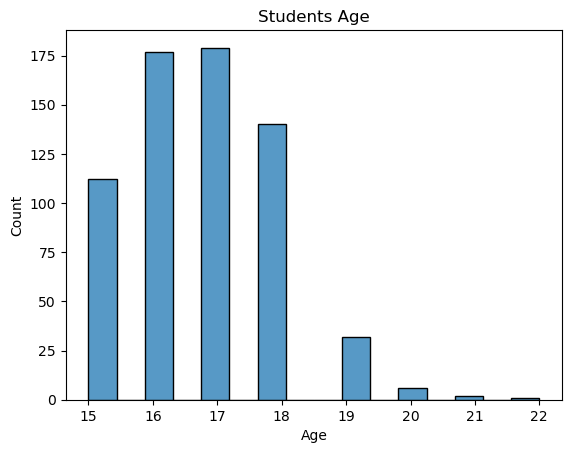

In [234]:
sns.histplot(data=df, x='Age')
plt.title('Students Age')

/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'School Absences vs. Final Grade')

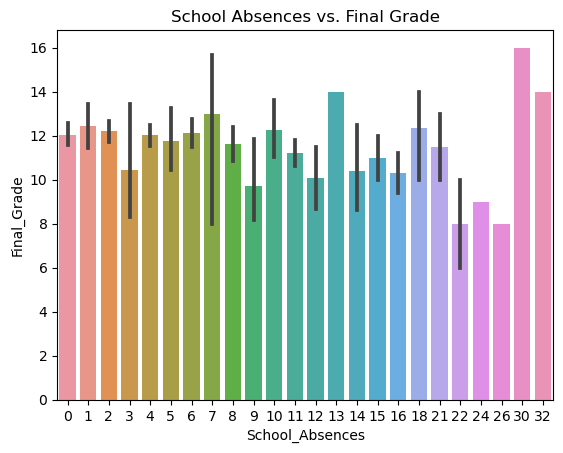

In [235]:
sns.barplot(data=df, x='School_Absences', y='Final_Grade')
plt.title("School Absences vs. Final Grade")

/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


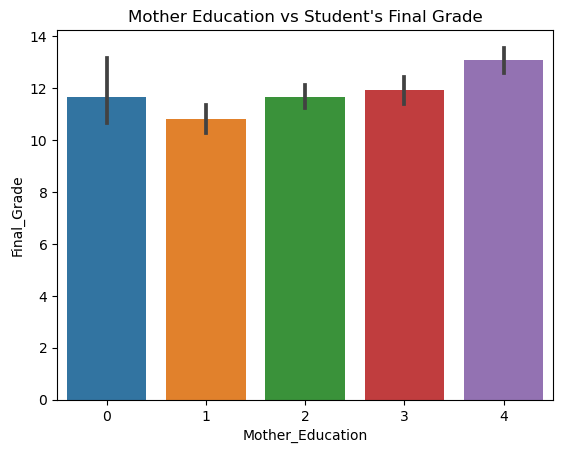

/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


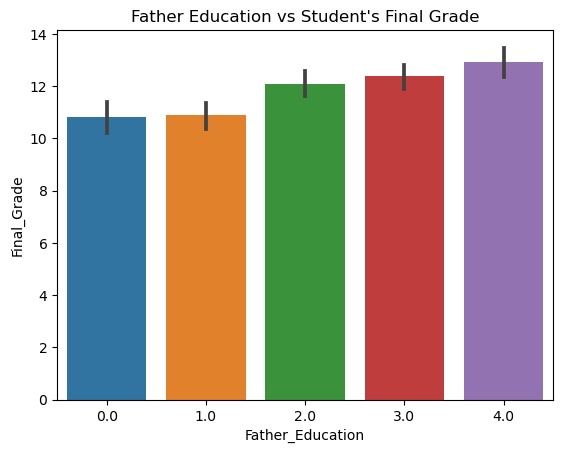

In [236]:
sns.barplot(data=df, x='Mother_Education', y='Final_Grade')
plt.title("Mother Education vs Student's Final Grade")
plt.show()
sns.barplot(data=df, x='Father_Education', y='Final_Grade')
plt.title("Father Education vs Student's Final Grade")
plt.show()

/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.

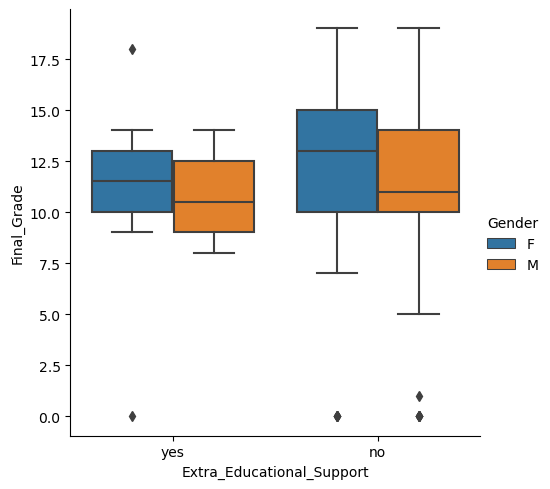

In [237]:
sns.catplot(data=df, x='Extra_Educational_Support', y='Final_Grade', hue='Gender', kind='box')
plt.show()

/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/seaborn/_oldcore.

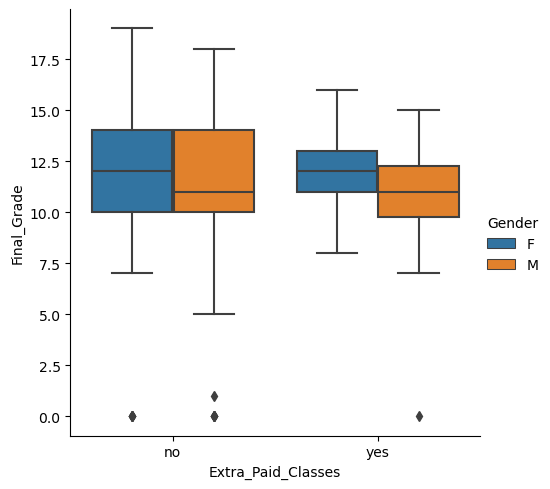

In [238]:
sns.catplot(data=df, x='Extra_Paid_Classes', y='Final_Grade', hue='Gender', kind='box')
plt.show()

In [239]:
mask = df.isna()
mask = mask.any(axis=1)
df_nas = df[mask]
print(df_nas.shape)
df_nas[['Father_Education','Home_to_School_Travel_Time','Weekly_Study_Time',
        'Extra_Educational_Support','Family_Educational_Support','Extra_Paid_Classes','Extra_Curricular_Activities',
       'Attended_Nursery_School','Wants_Higher_Education','Internet_Access_At_Home','Family_Relationship_Quality','Final_Grade']][:20]

(585, 32)


,Father_Education,Home_to_School_Travel_Time,Weekly_Study_Time,Extra_Educational_Support,Family_Educational_Support,Extra_Paid_Classes,Extra_Curricular_Activities,Attended_Nursery_School,Wants_Higher_Education,Internet_Access_At_Home,Family_Relationship_Quality,Final_Grade
0,4.0,2.0,2.0,yes,no,no,no,yes,NaN,no,4.0,11
1,1.0,1.0,NaN,NaN,yes,NaN,no,no,yes,yes,5.0,11
2,1.0,1.0,2.0,yes,no,no,no,yes,yes,yes,4.0,12
3,2.0,NaN,3.0,no,yes,no,yes,yes,yes,yes,3.0,14
4,3.0,1.0,2.0,no,yes,no,no,yes,yes,no,4.0,13
8,2.0,1.0,2.0,no,yes,no,no,NaN,yes,yes,4.0,17
9,4.0,NaN,2.0,no,yes,no,yes,yes,yes,NaN,5.0,13
11,1.0,3.0,3.0,no,yes,no,yes,yes,yes,NaN,5.0,13
12,4.0,1.0,1.0,no,yes,no,NaN,NaN,yes,yes,4.0,12
13,3.0,2.0,NaN,no,yes,no,no,yes,yes,yes,5.0,13


In [240]:
df.isna().sum()

School_Name                      0
Gender                           0
Age                              0
Home_Address_Type                0
Family_Size                      0
Parents_Cohabitation_Status      0
Mother_Education                 0
Father_Education                65
Mother_Job                       0
Father_Job                       0
School_Selection_Reason          0
Guardian                         0
Home_to_School_Travel_Time      65
Weekly_Study_Time               65
Past_Class_Failures              0
Extra_Educational_Support       65
Family_Educational_Support      65
Extra_Paid_Classes              65
Extra_Curricular_Activities     65
Attended_Nursery_School         65
Wants_Higher_Education          65
Internet_Access_At_Home         65
In_Romantic_Relationship        65
Family_Relationship_Quality     65
Free_Time_After_School          65
Going_Out_With_Friends          65
Workday_Alcohol_Consumption     65
Weekend_Alcohol_Consumption     65
Current_Health_Statu

In [247]:
def check_normality(column, bins=10):
    plt.hist(x=df[column], bins=bins)
    plt.title("normality check for variable {}".format(column))

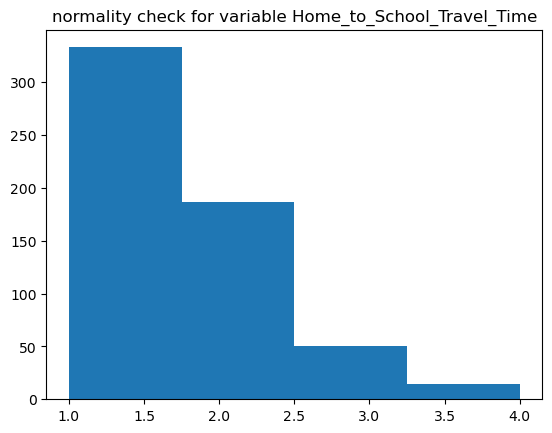

In [253]:
check_normality('Home_to_School_Travel_Time', 4)

In [163]:
def split_into_train_test(column_name):
    data = df.drop('Learning_Disabilities', axis=1)
    data = data.select_dtypes(['int64', 'float64'])
    test_data = data[data[column_name].isnull()]
    data.dropna(inplace=True)
    x_train = data.drop(column_name, axis=1)
    x_test = test_data.drop(column_name, axis=1)
    y_train = data[column_name]
    return x_train, y_train, x_test

In [164]:
def handle_nans_in_test_batch(x_test):
    for col_name in x_test:
        x_test[col_name] = x_test[col_name].fillna(x_test[col_name].median())
    return x_test

In [165]:
def predict_nans(col_name):
    x_train, y_train, x_test = split_into_train_test(col_name)
    x_test = handle_nans_in_test_batch(x_test)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test_imputed)
    return y_pred

In [166]:
df.loc[np.isnan(df['Father_Education']), 'Father_Education'] = predict_nans('Father_Education')
df.loc[np.isnan(df['Home_to_School_Travel_Time']), 'Home_to_School_Travel_Time'] = predict_nans('Home_to_School_Travel_Time')
df.loc[np.isnan(df['Weekly_Study_Time']), 'Weekly_Study_Time'] = predict_nans('Weekly_Study_Time')
df.loc[np.isnan(df['Family_Relationship_Quality']), 'Family_Relationship_Quality'] = predict_nans('Family_Relationship_Quality')
df.loc[np.isnan(df['Free_Time_After_School']), 'Free_Time_After_School'] = predict_nans('Free_Time_After_School')

df.loc[np.isnan(df['Going_Out_With_Friends']), 'Going_Out_With_Friends'] = predict_nans('Going_Out_With_Friends')
df.loc[np.isnan(df['Workday_Alcohol_Consumption']), 'Workday_Alcohol_Consumption'] = predict_nans('Workday_Alcohol_Consumption')
df.loc[np.isnan(df['Weekend_Alcohol_Consumption']), 'Weekend_Alcohol_Consumption'] = predict_nans('Weekend_Alcohol_Consumption')
df.loc[np.isnan(df['Current_Health_Status']), 'Current_Health_Status'] = predict_nans('Current_Health_Status')



/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/raniakhoury/anaconda3/envs/MLhouseAssignmentRania/lib/python3.11/site-pack

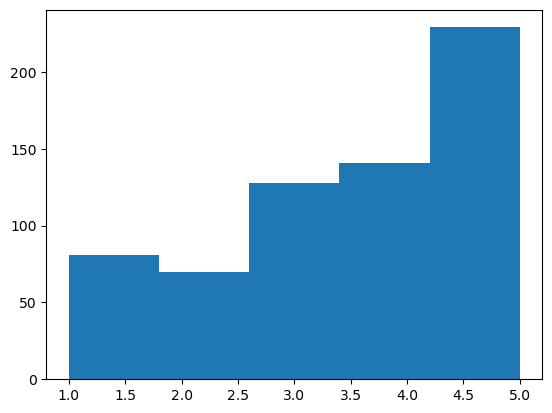

In [167]:
check_normality('Current_Health_Status', bins=5)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School_Name                  649 non-null    object 
 1   Gender                       649 non-null    object 
 2   Age                          649 non-null    int64  
 3   Home_Address_Type            649 non-null    object 
 4   Family_Size                  649 non-null    object 
 5   Parents_Cohabitation_Status  649 non-null    object 
 6   Mother_Education             649 non-null    int64  
 7   Father_Education             649 non-null    float64
 8   Mother_Job                   649 non-null    object 
 9   Father_Job                   649 non-null    object 
 10  School_Selection_Reason      649 non-null    object 
 11  Guardian                     649 non-null    object 
 12  Home_to_School_Travel_Time   649 non-null    float64
 13  Weekly_Study_Time   

In [169]:
def check_categorical(col):
    print(df[col].describe())
    print(df[col].value_counts())
    print(df[col].isna().sum())

In [170]:
def fill_unkown(col):
    df[col] = df[col].fillna('Unkown')

In [171]:
check_categorical('Learning_Disabilities')

count              378
unique              35
top       Near-sighted
freq                39
Name: Learning_Disabilities, dtype: object
Learning_Disabilities
Near-sighted                39
Dyscalculia                 35
ADHD                        33
Far-sighted                 33
Dyslexia                    28
Dyscalculia,Far-sighted     14
Far-sighted,Dyslexia        12
ADHD,Far-sighted            12
Near-sighted,Dyscalculia    11
Dyslexia,Near-sighted       11
Dyslexia,None                9
None,Far-sighted             9
Dyslexia,Far-sighted         9
ADHD,None                    9
Near-sighted,Far-sighted     8
Far-sighted,Near-sighted     7
Far-sighted,Dyscalculia      7
Dyscalculia,Dyslexia         7
Dyscalculia,None             7
None,ADHD                    6
Far-sighted,ADHD             6
Dyscalculia,ADHD             6
Far-sighted,None             6
ADHD,Dyscalculia             6
None,Dyscalculia             6
Dyslexia,Dyscalculia         6
Near-sighted,Dyslexia        5
ADHD,N

In [172]:
fill_unkown('Extra_Educational_Support')
fill_unkown('Family_Educational_Support')
fill_unkown('Extra_Paid_Classes')
fill_unkown('Extra_Curricular_Activities')
fill_unkown('Attended_Nursery_School')
fill_unkown('Wants_Higher_Education')
fill_unkown('Internet_Access_At_Home')
fill_unkown('In_Romantic_Relationship')
fill_unkown('Learning_Disabilities')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School_Name                  649 non-null    object 
 1   Gender                       649 non-null    object 
 2   Age                          649 non-null    int64  
 3   Home_Address_Type            649 non-null    object 
 4   Family_Size                  649 non-null    object 
 5   Parents_Cohabitation_Status  649 non-null    object 
 6   Mother_Education             649 non-null    int64  
 7   Father_Education             649 non-null    float64
 8   Mother_Job                   649 non-null    object 
 9   Father_Job                   649 non-null    object 
 10  School_Selection_Reason      649 non-null    object 
 11  Guardian                     649 non-null    object 
 12  Home_to_School_Travel_Time   649 non-null    float64
 13  Weekly_Study_Time   

In [174]:
df.head(5)

,School_Name,Gender,Age,Home_Address_Type,Family_Size,Parents_Cohabitation_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,In_Romantic_Relationship,Family_Relationship_Quality,Free_Time_After_School,Going_Out_With_Friends,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Current_Health_Status,School_Absences,Final_Grade,Learning_Disabilities
0,GP,F,18,U,GT3,A,4,4.0,at_home,teacher,...,no,4.0,3.0,4.0,1.0,1.000000,3.0,4,11,ADHD
1,GP,F,17,U,GT3,T,1,1.0,at_home,other,...,no,5.0,3.0,3.0,1.0,1.000000,3.0,2,11,Unkown
2,GP,F,15,U,LE3,T,1,1.0,at_home,other,...,Unkown,4.0,3.0,2.0,2.0,3.000000,3.0,6,12,"Dyslexia,Near-sighted"
3,GP,F,15,U,GT3,T,4,2.0,health,services,...,yes,3.0,2.0,2.0,1.0,1.000000,5.0,0,14,Unkown
4,GP,F,16,U,GT3,T,3,3.0,other,other,...,no,4.0,3.0,2.0,1.0,3.112368,5.0,0,13,"ADHD,None"


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School_Name                  649 non-null    object 
 1   Gender                       649 non-null    object 
 2   Age                          649 non-null    int64  
 3   Home_Address_Type            649 non-null    object 
 4   Family_Size                  649 non-null    object 
 5   Parents_Cohabitation_Status  649 non-null    object 
 6   Mother_Education             649 non-null    int64  
 7   Father_Education             649 non-null    float64
 8   Mother_Job                   649 non-null    object 
 9   Father_Job                   649 non-null    object 
 10  School_Selection_Reason      649 non-null    object 
 11  Guardian                     649 non-null    object 
 12  Home_to_School_Travel_Time   649 non-null    float64
 13  Weekly_Study_Time   

In [176]:
df.select_dtypes('object')

,School_Name,Gender,Home_Address_Type,Family_Size,Parents_Cohabitation_Status,Mother_Job,Father_Job,School_Selection_Reason,Guardian,Extra_Educational_Support,Family_Educational_Support,Extra_Paid_Classes,Extra_Curricular_Activities,Attended_Nursery_School,Wants_Higher_Education,Internet_Access_At_Home,In_Romantic_Relationship,Learning_Disabilities
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,Unkown,no,no,ADHD
1,GP,F,U,GT3,T,at_home,other,course,father,Unkown,yes,Unkown,no,no,yes,yes,no,Unkown
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,Unkown,"Dyslexia,Near-sighted"
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes,Unkown
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no,"ADHD,None"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no,Unkown
645,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,no,no,Unkown,yes,yes,no,Far-sighted
646,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no,"None,Far-sighted"
647,MS,M,U,LE3,T,services,services,course,mother,no,no,no,Unkown,no,yes,yes,no,"Dyscalculia,Far-sighted"


In [187]:
df['Learning_Disabilities'].describe()

count        649
unique        36
top       Unkown
freq         271
Name: Learning_Disabilities, dtype: object

In [188]:
x = df.drop('Final_Grade', axis=1)
x

,School_Name,Gender,Age,Home_Address_Type,Family_Size,Parents_Cohabitation_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Internet_Access_At_Home,In_Romantic_Relationship,Family_Relationship_Quality,Free_Time_After_School,Going_Out_With_Friends,Workday_Alcohol_Consumption,Weekend_Alcohol_Consumption,Current_Health_Status,School_Absences,Learning_Disabilities
0,GP,F,18,U,GT3,A,4,4.0,at_home,teacher,...,no,no,4.000000,3.0,4.0000,1.0,1.000000,3.000000,4,ADHD
1,GP,F,17,U,GT3,T,1,1.0,at_home,other,...,yes,no,5.000000,3.0,3.0000,1.0,1.000000,3.000000,2,Unkown
2,GP,F,15,U,LE3,T,1,1.0,at_home,other,...,yes,Unkown,4.000000,3.0,2.0000,2.0,3.000000,3.000000,6,"Dyslexia,Near-sighted"
3,GP,F,15,U,GT3,T,4,2.0,health,services,...,yes,yes,3.000000,2.0,2.0000,1.0,1.000000,5.000000,0,Unkown
4,GP,F,16,U,GT3,T,3,3.0,other,other,...,no,no,4.000000,3.0,2.0000,1.0,3.112368,5.000000,0,"ADHD,None"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3.0,services,other,...,yes,no,5.000000,4.0,2.0000,1.0,2.000000,5.000000,4,Unkown
645,MS,F,18,U,LE3,T,3,1.0,teacher,services,...,yes,no,3.774514,3.0,4.0000,1.0,1.000000,1.000000,4,Far-sighted
646,MS,F,18,U,GT3,T,1,1.0,other,other,...,no,no,1.000000,1.0,1.0000,1.0,1.000000,5.000000,6,"None,Far-sighted"
647,MS,M,17,U,LE3,T,3,1.0,services,services,...,yes,no,2.000000,4.0,5.0000,3.0,4.000000,3.882383,6,"Dyscalculia,Far-sighted"


In [198]:
numerical_features = x.select_dtypes(include=['float64', 'int64']).columns
numerical_features

Index(['Age', 'Mother_Education', 'Father_Education',
       'Home_to_School_Travel_Time', 'Weekly_Study_Time',
       'Past_Class_Failures', 'Family_Relationship_Quality',
       'Free_Time_After_School', 'Going_Out_With_Friends',
       'Workday_Alcohol_Consumption', 'Weekend_Alcohol_Consumption',
       'Current_Health_Status', 'School_Absences'],
      dtype='object')

In [200]:
categorical = x.select_dtypes(include=['object']).columns

In [204]:
categorical.drop('Learning_Disabilities')

Index(['School_Name', 'Gender', 'Home_Address_Type', 'Family_Size',
       'Parents_Cohabitation_Status', 'Mother_Job', 'Father_Job',
       'School_Selection_Reason', 'Guardian', 'Extra_Educational_Support',
       'Family_Educational_Support', 'Extra_Paid_Classes',
       'Extra_Curricular_Activities', 'Attended_Nursery_School',
       'Wants_Higher_Education', 'Internet_Access_At_Home',
       'In_Romantic_Relationship'],
      dtype='object')

In [205]:
categorical

Index(['School_Name', 'Gender', 'Home_Address_Type', 'Family_Size',
       'Parents_Cohabitation_Status', 'Mother_Job', 'Father_Job',
       'School_Selection_Reason', 'Guardian', 'Extra_Educational_Support',
       'Family_Educational_Support', 'Extra_Paid_Classes',
       'Extra_Curricular_Activities', 'Attended_Nursery_School',
       'Wants_Higher_Education', 'Internet_Access_At_Home',
       'In_Romantic_Relationship', 'Learning_Disabilities'],
      dtype='object')

In [217]:
categorical = categorical.delete(categorical.size-1)

In [218]:
categorical

Index(['School_Name', 'Gender', 'Home_Address_Type', 'Family_Size',
       'Parents_Cohabitation_Status', 'Mother_Job', 'Father_Job',
       'School_Selection_Reason', 'Guardian', 'Extra_Educational_Support',
       'Family_Educational_Support', 'Extra_Paid_Classes',
       'Extra_Curricular_Activities', 'Attended_Nursery_School',
       'Wants_Higher_Education', 'Internet_Access_At_Home',
       'In_Romantic_Relationship'],
      dtype='object')